# 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠順利訓練!
最後一天的作業請閱讀這篇非常詳盡的文章，基本上已經涵蓋了所有訓練　CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!
另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以參考

In [1]:
from tensorflow.python import keras
from tensorflow.python.keras.datasets import cifar10
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.optimizers import RMSprop, Adam
import os

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\pyth

## 接下來我們使用 CNN 來訓練神經網路
CNN 的原理非常適合處理影像類的資料，就讓我們來看看，同樣的訓練條件，CNN 是否顯著優於 DNN 呢?

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [25]:
model = Sequential()
model.add(Conv2D(1024, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 載入 Callbacks
from tensorflow.python.keras.callbacks import ModelCheckpoint

model_ckpt = ModelCheckpoint("cifar10-1.h5", 
                             monitor="val_accuracy", 
                             save_best_only=True,
                              )


history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=40,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    shuffle=True,
                    callbacks=[model_ckpt])
# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]
#score = model.evaluate(x_test, y_test, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 32, 32, 1024)      28672     
_________________________________________________________________
activation_73 (Activation)   (None, 32, 32, 1024)      0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 1024)      4096      
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 30, 30, 1024)      9438208   
_________________________________________________________________
activation_74 (Activation)   (None, 30, 30, 1024)      0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 1024)      0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 15, 15, 1024)    

50000/50000 [==============================] - 205s 4ms/sample - loss: 0.0881 - accuracy: 0.9725 - val_loss: 0.6885 - val_accuracy: 0.8553
Epoch 29/40
50000/50000 [==============================] - 205s 4ms/sample - loss: 0.0912 - accuracy: 0.9719 - val_loss: 0.6795 - val_accuracy: 0.8512
Epoch 30/40
50000/50000 [==============================] - 206s 4ms/sample - loss: 0.0889 - accuracy: 0.9730 - val_loss: 0.8342 - val_accuracy: 0.8378
Epoch 31/40
50000/50000 [==============================] - 206s 4ms/sample - loss: 0.0782 - accuracy: 0.9763 - val_loss: 0.7284 - val_accuracy: 0.8545
Epoch 32/40
50000/50000 [==============================] - 206s 4ms/sample - loss: 0.0774 - accuracy: 0.9764 - val_loss: 0.6661 - val_accuracy: 0.8554
Epoch 33/40
50000/50000 [==============================] - 206s 4ms/sample - loss: 0.0843 - accuracy: 0.9748 - val_loss: 0.7438 - val_accuracy: 0.8528
Epoch 34/40
50000/50000 [==============================] - 207s 4ms/sample - loss: 0.0795 - accuracy: 0.97

In [26]:
model = keras.models.load_model("cifar10-1.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 14s 1ms/sample - loss: 0.6480 - accuracy: 0.8647


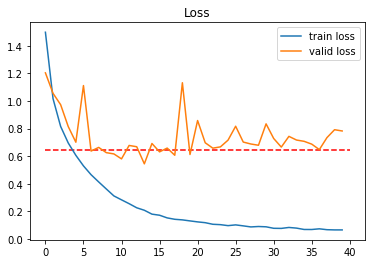

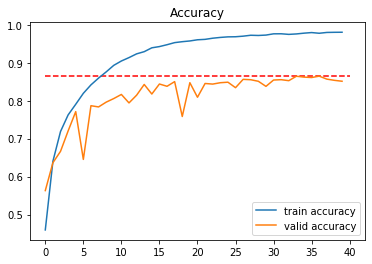

In [27]:
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()